In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [14]:
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-poster')

In [15]:
# From Covid Tracking API
# https://covidtracking.com/api/
# Getting sporadic 403 errors when attempting to read URLs directly
# in Pandas so downloading files locally first
api_us = 'https://covidtracking.com/api/us/daily'
api_states = 'https://covidtracking.com/api/states/daily'

f_us = 'data/api_us.json'
f_states = 'data/api_states.json'

f_pop = 'associated-data/us_census_data/us_census_2018_population_estimates_states.csv'

In [16]:
r = requests.get(api_us, allow_redirects=True)
open(f_us, 'wb').write(r.content)

r = requests.get(api_states, allow_redirects=True)
open(f_states, 'wb').write(r.content)

134255

In [17]:
df_us = pd.read_json(f_us)
df_states = pd.read_json(f_states)
df_pop = pd.read_csv(f_pop)

In [18]:
df_us.shape

(18, 9)

In [19]:
df_states.shape

(869, 9)

In [20]:
df_us.tail()

,date,states,positive,negative,posNeg,pending,hospitalized,death,total
13,20200317,56,5723,47604,53327,1687,NaN,90.0,54957
14,20200318,56,7731,66225,73956,2538,NaN,112.0,76495
15,20200319,56,11723,89119,100842,3025,NaN,160.0,103867
16,20200320,56,17038,118147,135185,3336,NaN,219.0,138521
17,20200321,56,23203,156017,179220,3477,1964.0,272.0,182697


In [21]:
df_states.tail()

,date,state,positive,negative,pending,hospitalized,death,total,dateChecked
864,20200304,OR,3.0,29.0,18.0,NaN,NaN,50,2020-03-04T21:00:00Z
865,20200304,SC,0.0,5.0,0.0,NaN,NaN,5,2020-03-04T21:00:00Z
866,20200304,TX,1.0,NaN,NaN,NaN,NaN,1,2020-03-04T21:00:00Z
867,20200304,WA,39.0,NaN,NaN,NaN,NaN,39,2020-03-04T21:00:00Z
868,20200304,WI,1.0,19.0,6.0,NaN,NaN,26,2020-03-04T21:00:00Z


In [22]:
df_pop.head()

,state,state_name,geo_id,population,pop_density
0,AL,Alabama,1,4887871,96.509389
1,AK,Alaska,2,737438,1.291523
2,AZ,Arizona,4,7171646,63.135855
3,AR,Arkansas,5,3013825,57.919684
4,CA,California,6,39557045,253.906502


In [23]:
df_us['date'] = df_us['date'].apply(
    lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df_states['date'] = df_states['date'].apply(
    lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [24]:
# Merge in population data
df_states = pd.merge(df_states, df_pop, on='state')

# Calculate positive as percent of population
df_states['pos_by_pop'] = df_states['positive'] / df_states['population']

# Calculate total tests
df_states['total'] = df_states['positive'] + df_states['negative']

# Calculate percent of tests that are positive
df_states['positive_rate'] = df_states['positive'] / df_states['total']

# Calculate percent of population tested
df_states['test_rate'] = df_states['total'] / df_states['population']

In [25]:
df_states.tail()

,date,state,positive,negative,pending,hospitalized,death,total,dateChecked,state_name,geo_id,population,pop_density,pos_by_pop,positive_rate,test_rate
840,2020-03-11,WY,0.0,NaN,NaN,NaN,NaN,NaN,2020-03-11T20:00:00Z,Wyoming,56,577737,5.950611,0.0,NaN,NaN
841,2020-03-10,WY,0.0,0.0,0.0,NaN,NaN,0.0,2020-03-10T20:00:00Z,Wyoming,56,577737,5.950611,0.0,NaN,0.0
842,2020-03-09,WY,0.0,NaN,NaN,NaN,NaN,NaN,2020-03-09T20:00:00Z,Wyoming,56,577737,5.950611,0.0,NaN,NaN
843,2020-03-08,WY,0.0,NaN,NaN,NaN,NaN,NaN,2020-03-08T20:00:00Z,Wyoming,56,577737,5.950611,0.0,NaN,NaN
844,2020-03-07,WY,0.0,NaN,NaN,NaN,NaN,NaN,2020-03-07T21:00:00Z,Wyoming,56,577737,5.950611,0.0,NaN,NaN


In [26]:
df_states.describe()

,positive,negative,pending,hospitalized,death,total,geo_id,population,pop_density,pos_by_pop,positive_rate,test_rate
count,845.000000,738.000000,329.000000,11.000000,221.000000,738.000000,845.000000,8.450000e+02,839.000000,8.450000e+02,733.000000,738.000000
mean,96.938462,805.707317,73.212766,178.545455,5.135747,914.119241,29.314793,6.675199e+06,434.002430,1.209856e-05,0.116091,0.000170
std,489.906879,2530.956238,155.548627,474.727999,11.807149,2986.414816,16.064896,7.477036e+06,1612.137161,3.068019e-05,0.131307,0.000341
min,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,1.000000,5.777370e+05,1.291523,0.000000e+00,0.000000,0.000000
25%,2.000000,38.000000,4.000000,2.000000,0.000000,44.250000,16.000000,1.805832e+06,54.955978,4.964653e-07,0.030457,0.000013
50%,12.000000,131.000000,17.000000,25.000000,1.000000,159.500000,29.000000,4.659978e+06,109.860468,3.178082e-06,0.083333,0.000040
75%,52.000000,478.750000,63.000000,59.500000,4.000000,553.250000,42.000000,7.535591e+06,229.511156,1.243995e-05,0.151261,0.000161
max,10356.000000,35081.000000,1026.000000,1603.000000,83.000000,45437.000000,72.000000,3.955704e+07,11490.119540,5.299299e-04,0.818630,0.003084


# United States Positive Cases

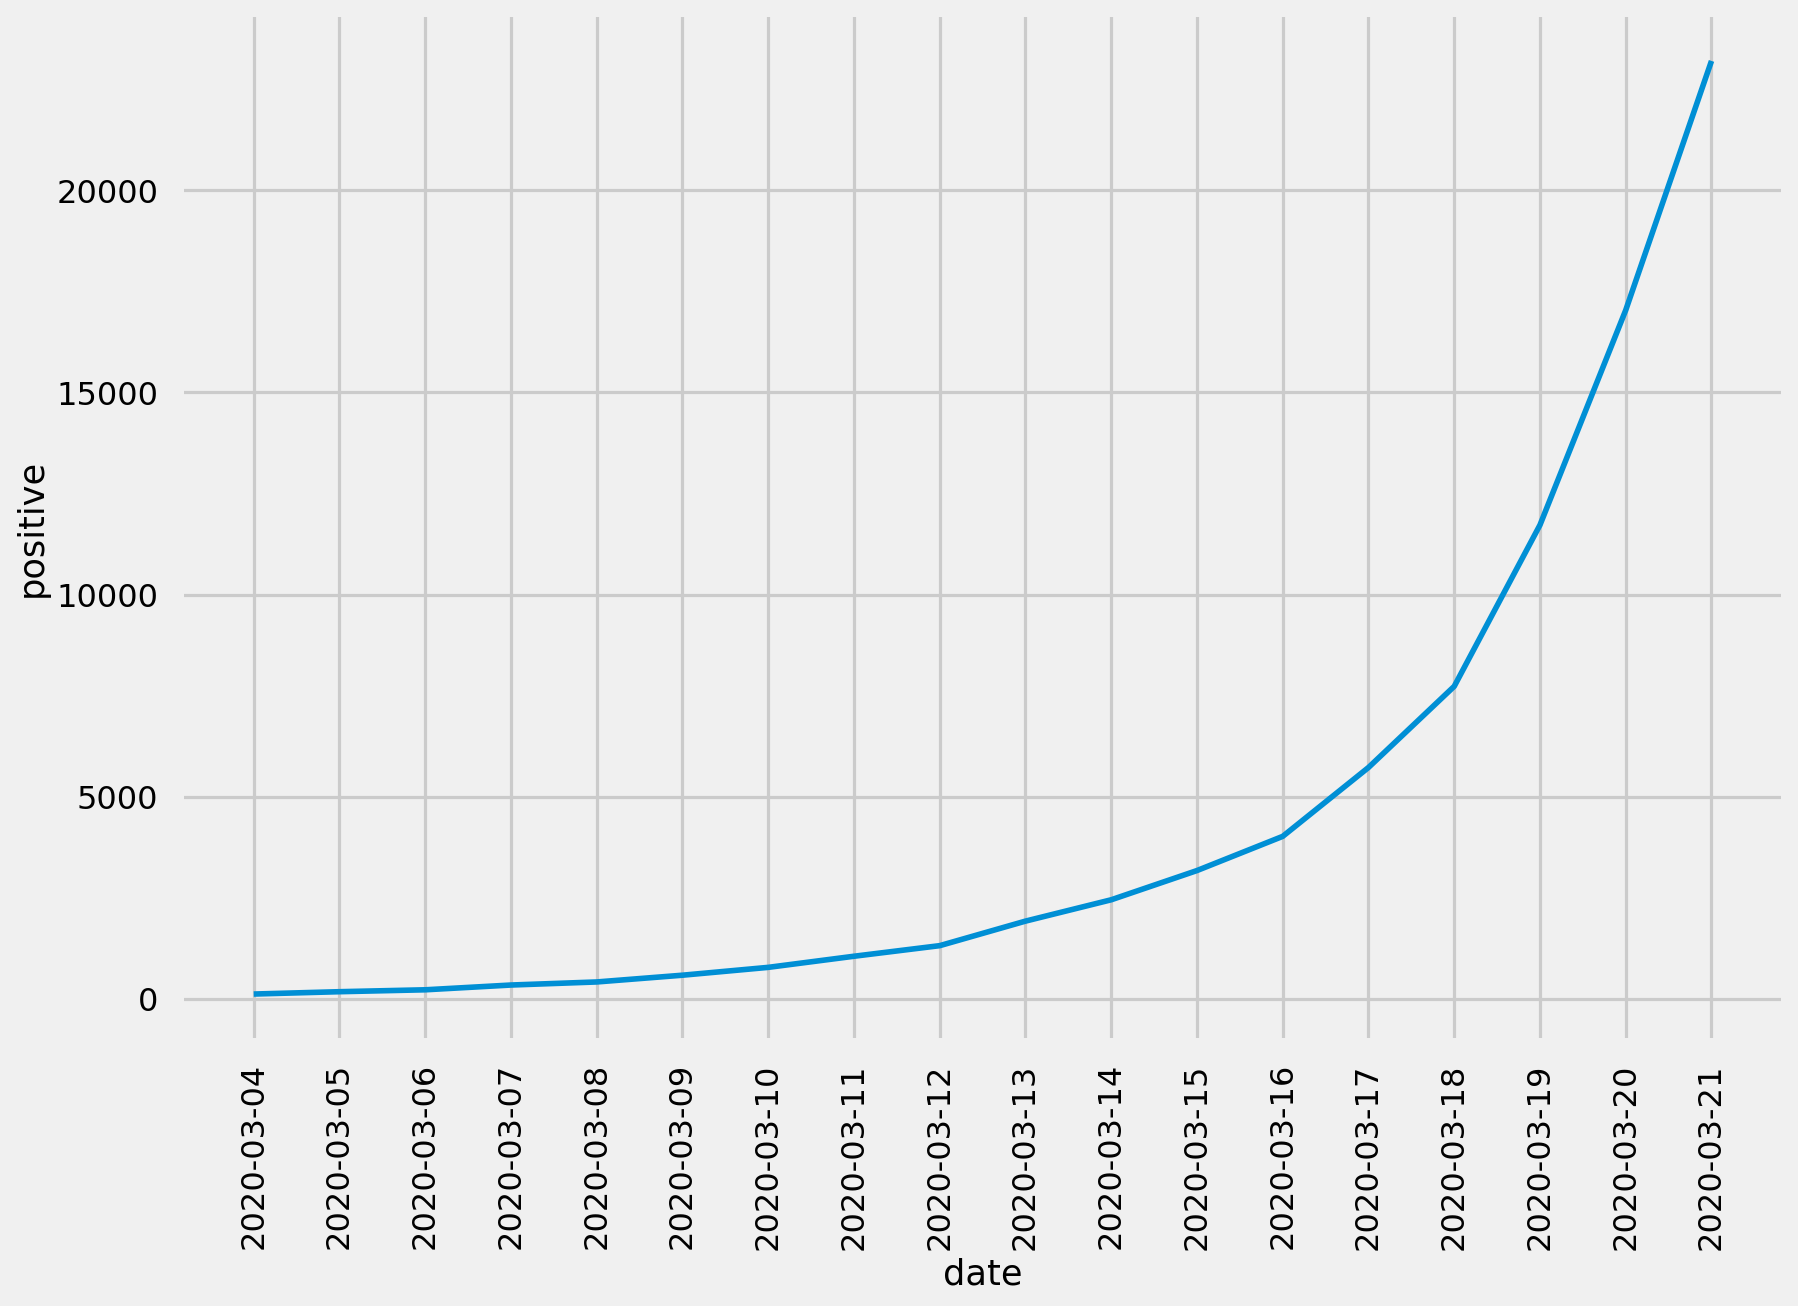

In [27]:
ax = sns.lineplot(x="date", 
                  y="positive", 
                  data=df_us)
ax.set(xticks=df_us.date.values)
plt.xticks(rotation=90)
plt.show()

# California Positive Cases

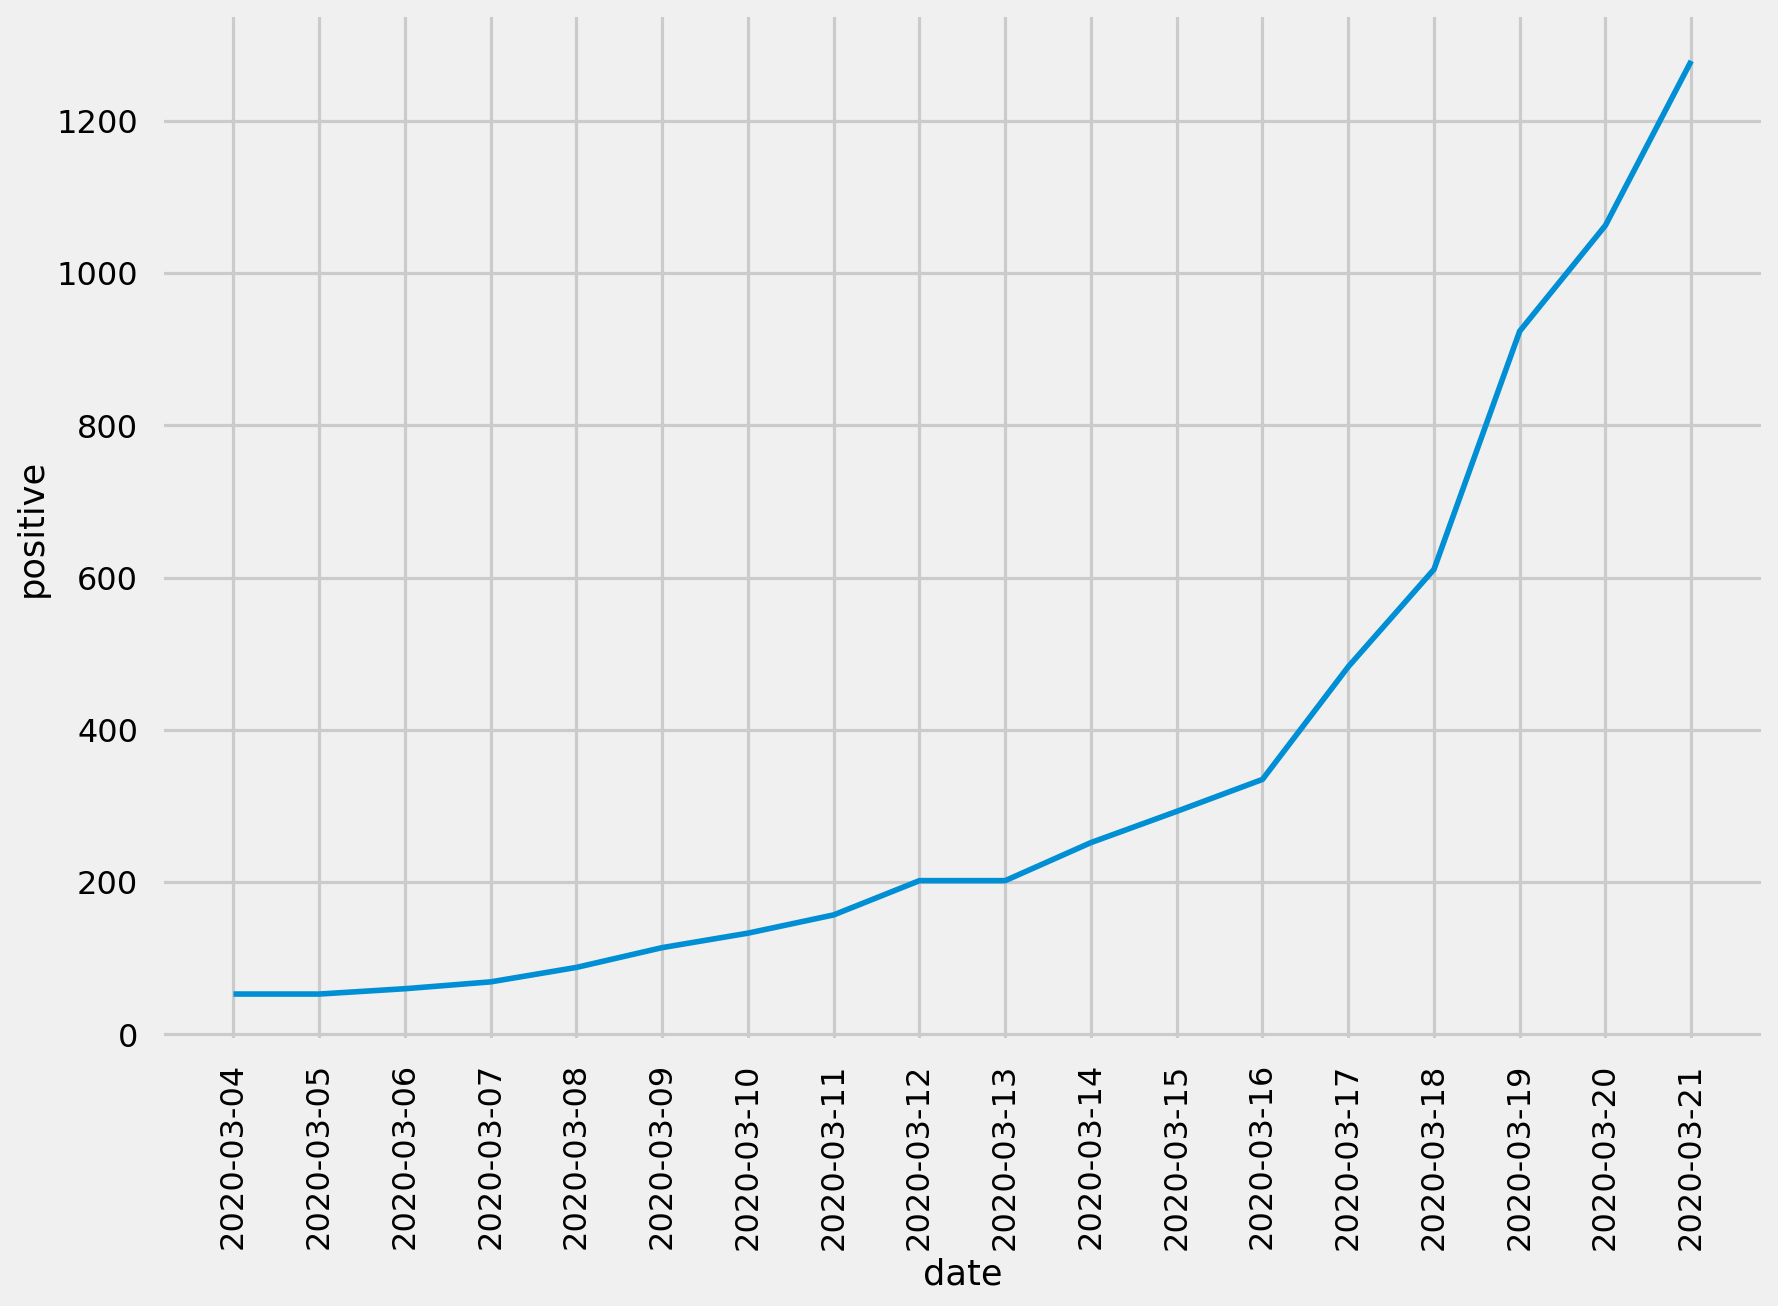

In [28]:
ax = sns.lineplot(x="date", y="positive", 
                  data=df_states.query('state == "CA"'))
ax.set(xticks=df_states.query('state == "CA"').date.values)
plt.xticks(rotation=90)
plt.show()

## Positive and Total Tests

## California

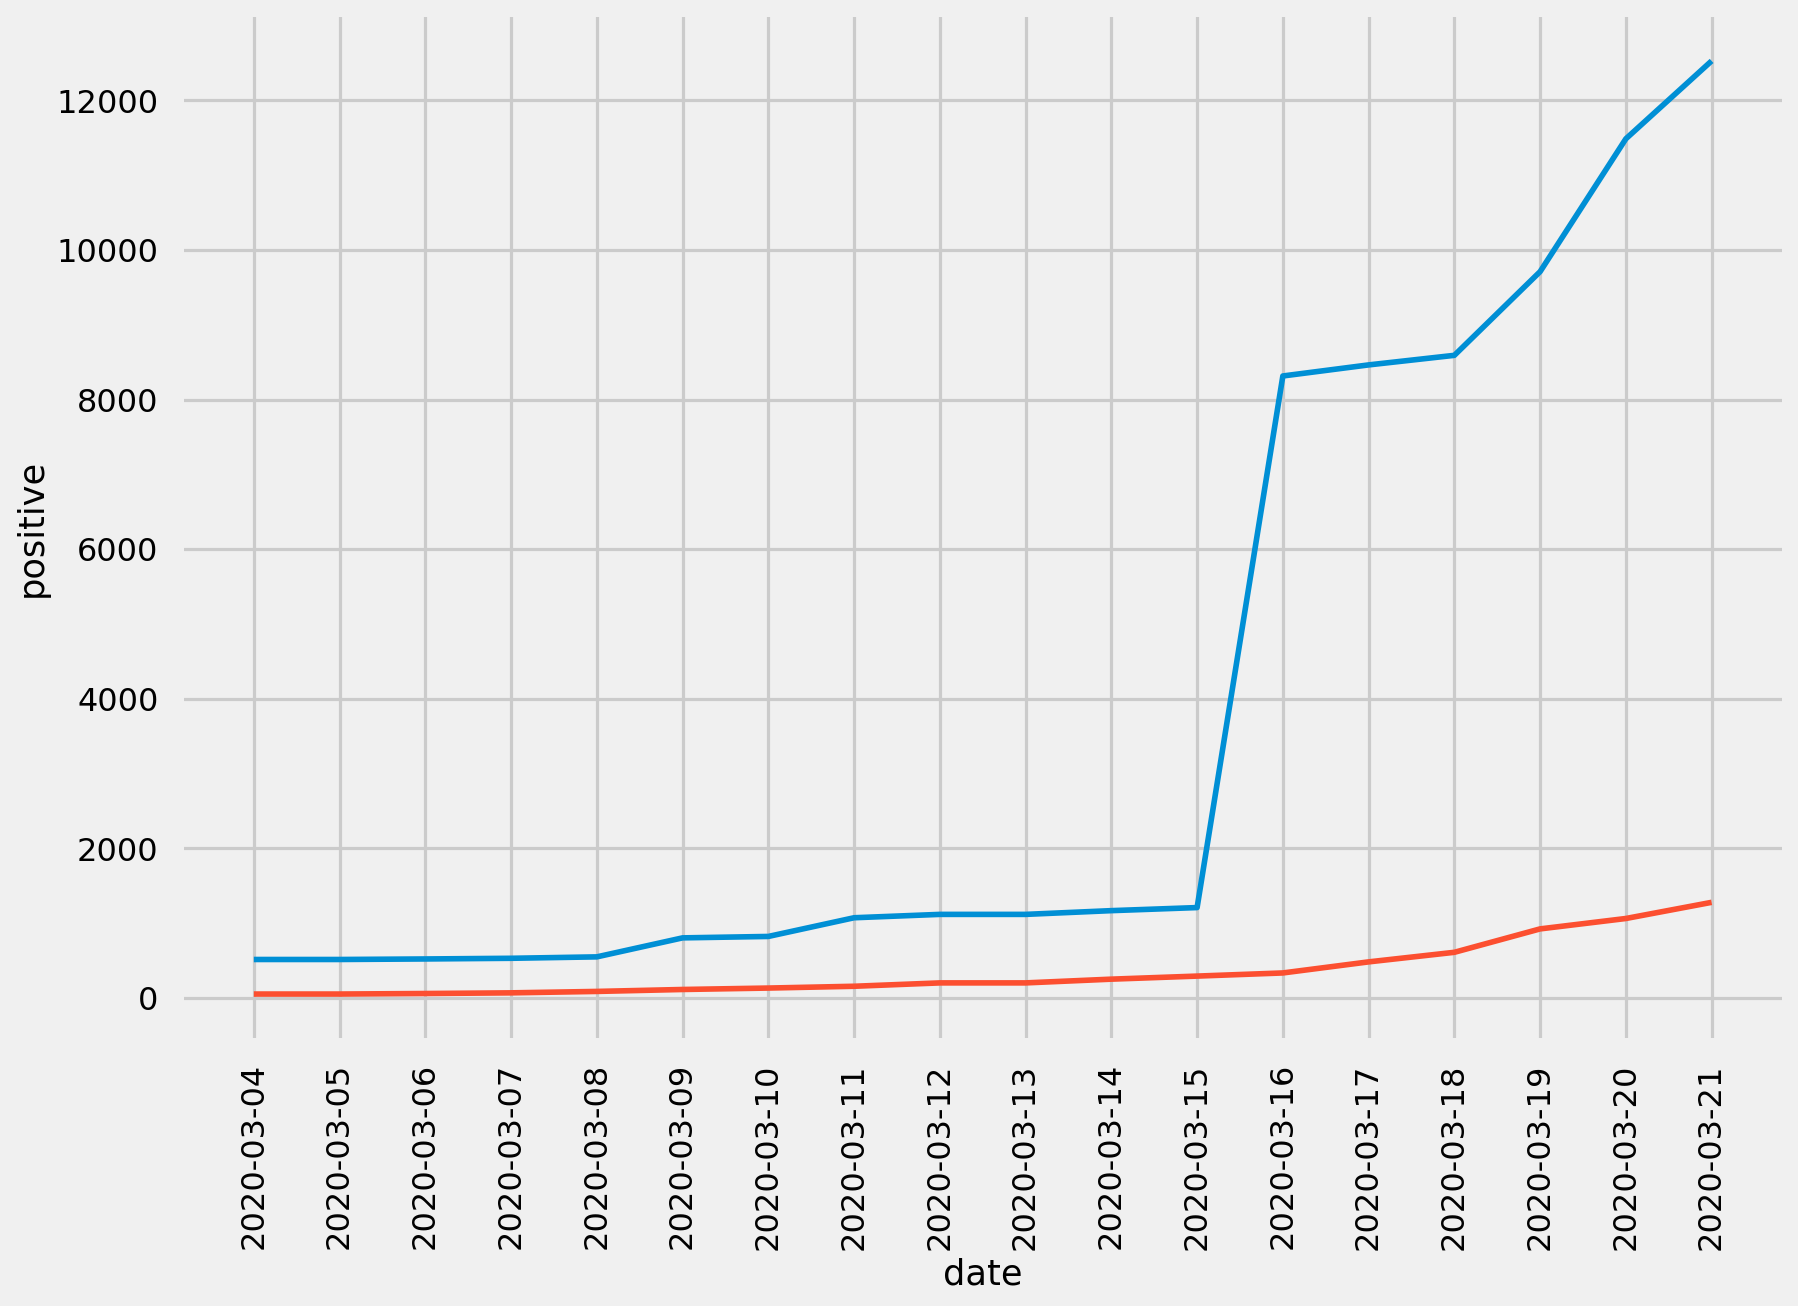

In [29]:
ax = sns.lineplot(x="date", y="total", 
                  data=df_states.query('state == "CA"'))
ax = sns.lineplot(x="date", y="positive", 
                  data=df_states.query('state == "CA"'))
ax.set(xticks=df_states.query('state == "CA"').date.values)
plt.xticks(rotation=90)
plt.show()

## New York

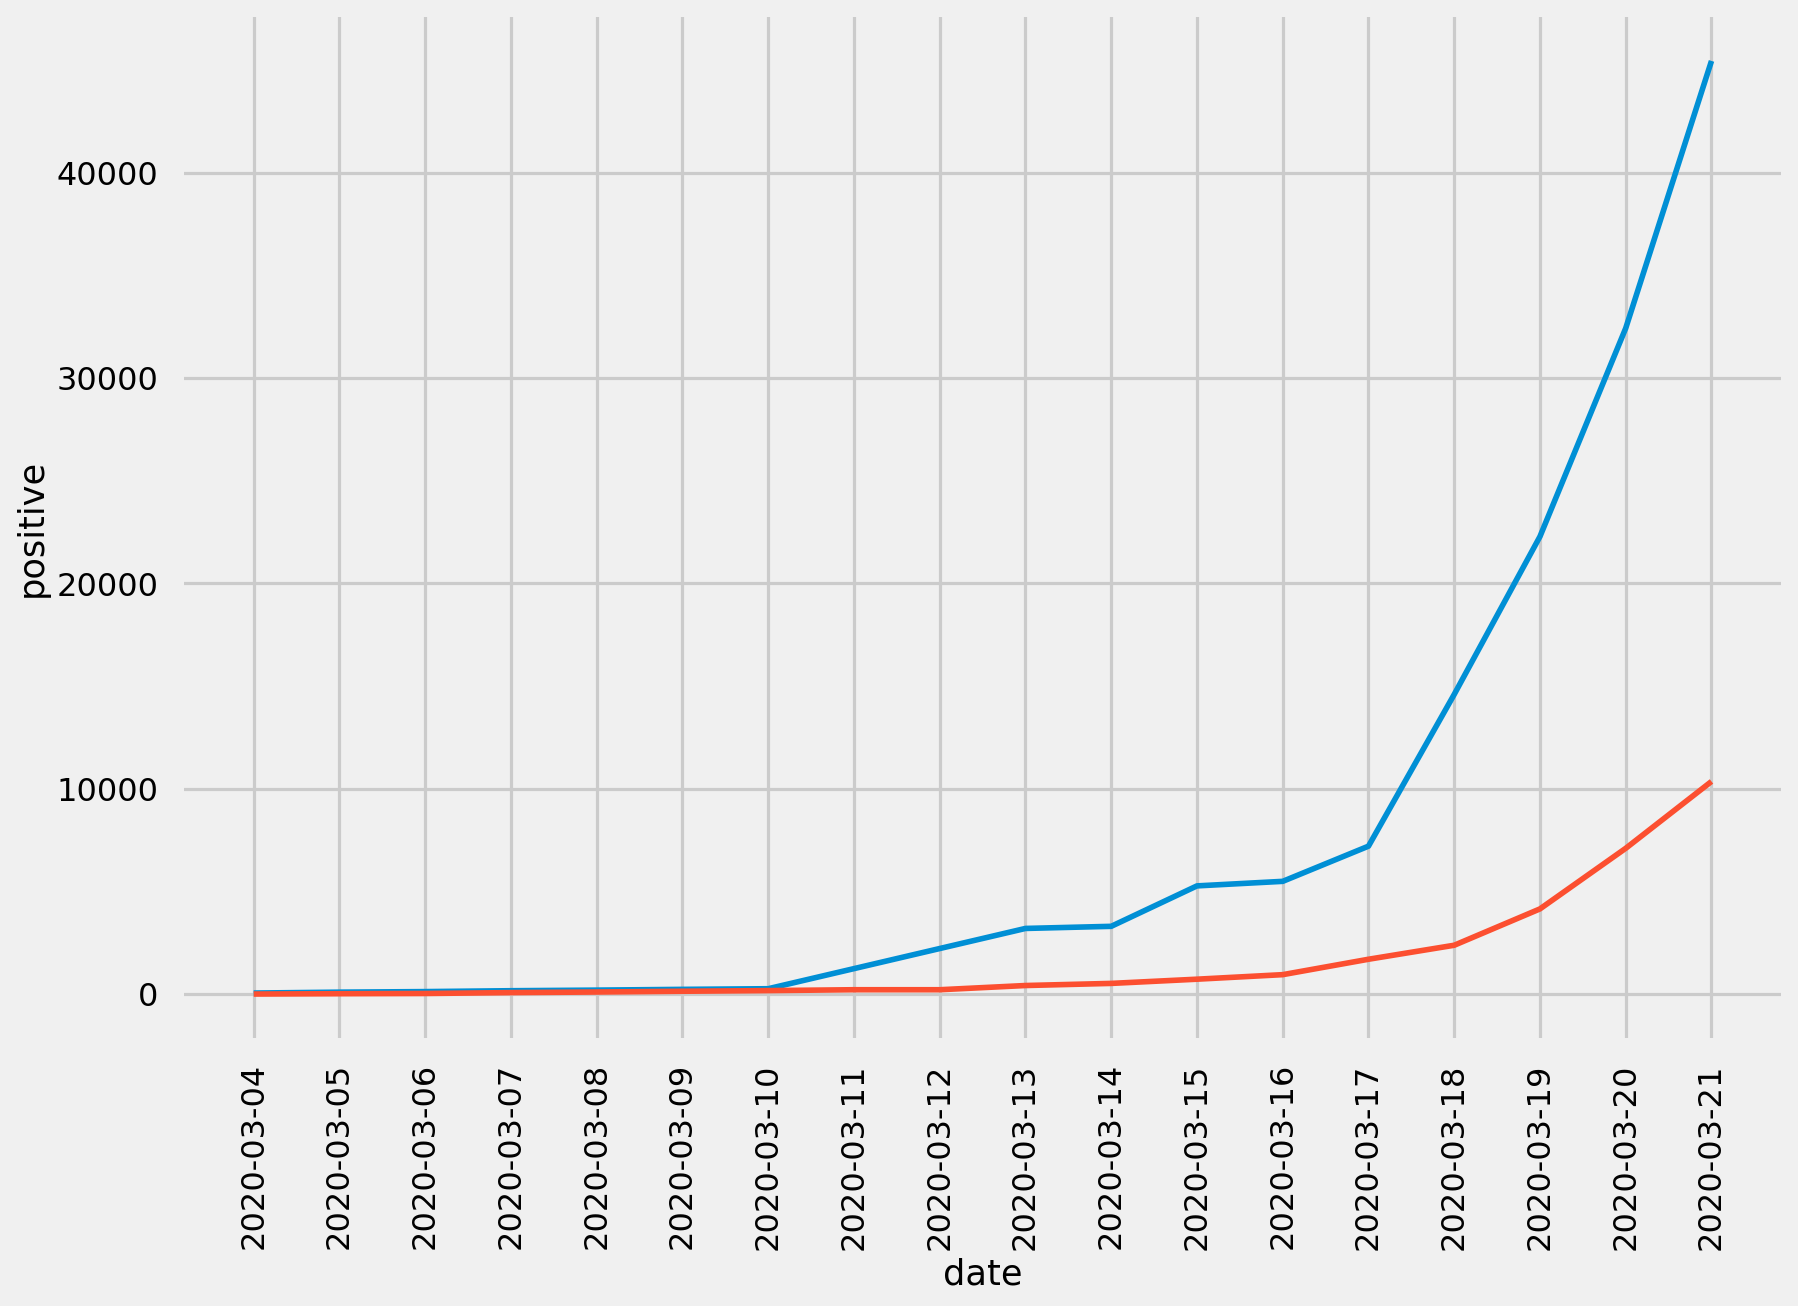

In [30]:
ax = sns.lineplot(x="date", y="total", 
                  data=df_states.query('state == "NY"'))
ax = sns.lineplot(x="date", y="positive", 
                  data=df_states.query('state == "NY"'))
ax.set(xticks=df_states.query('state == "NY"').date.values)
plt.xticks(rotation=90)
plt.show()

# All States Positive Cases

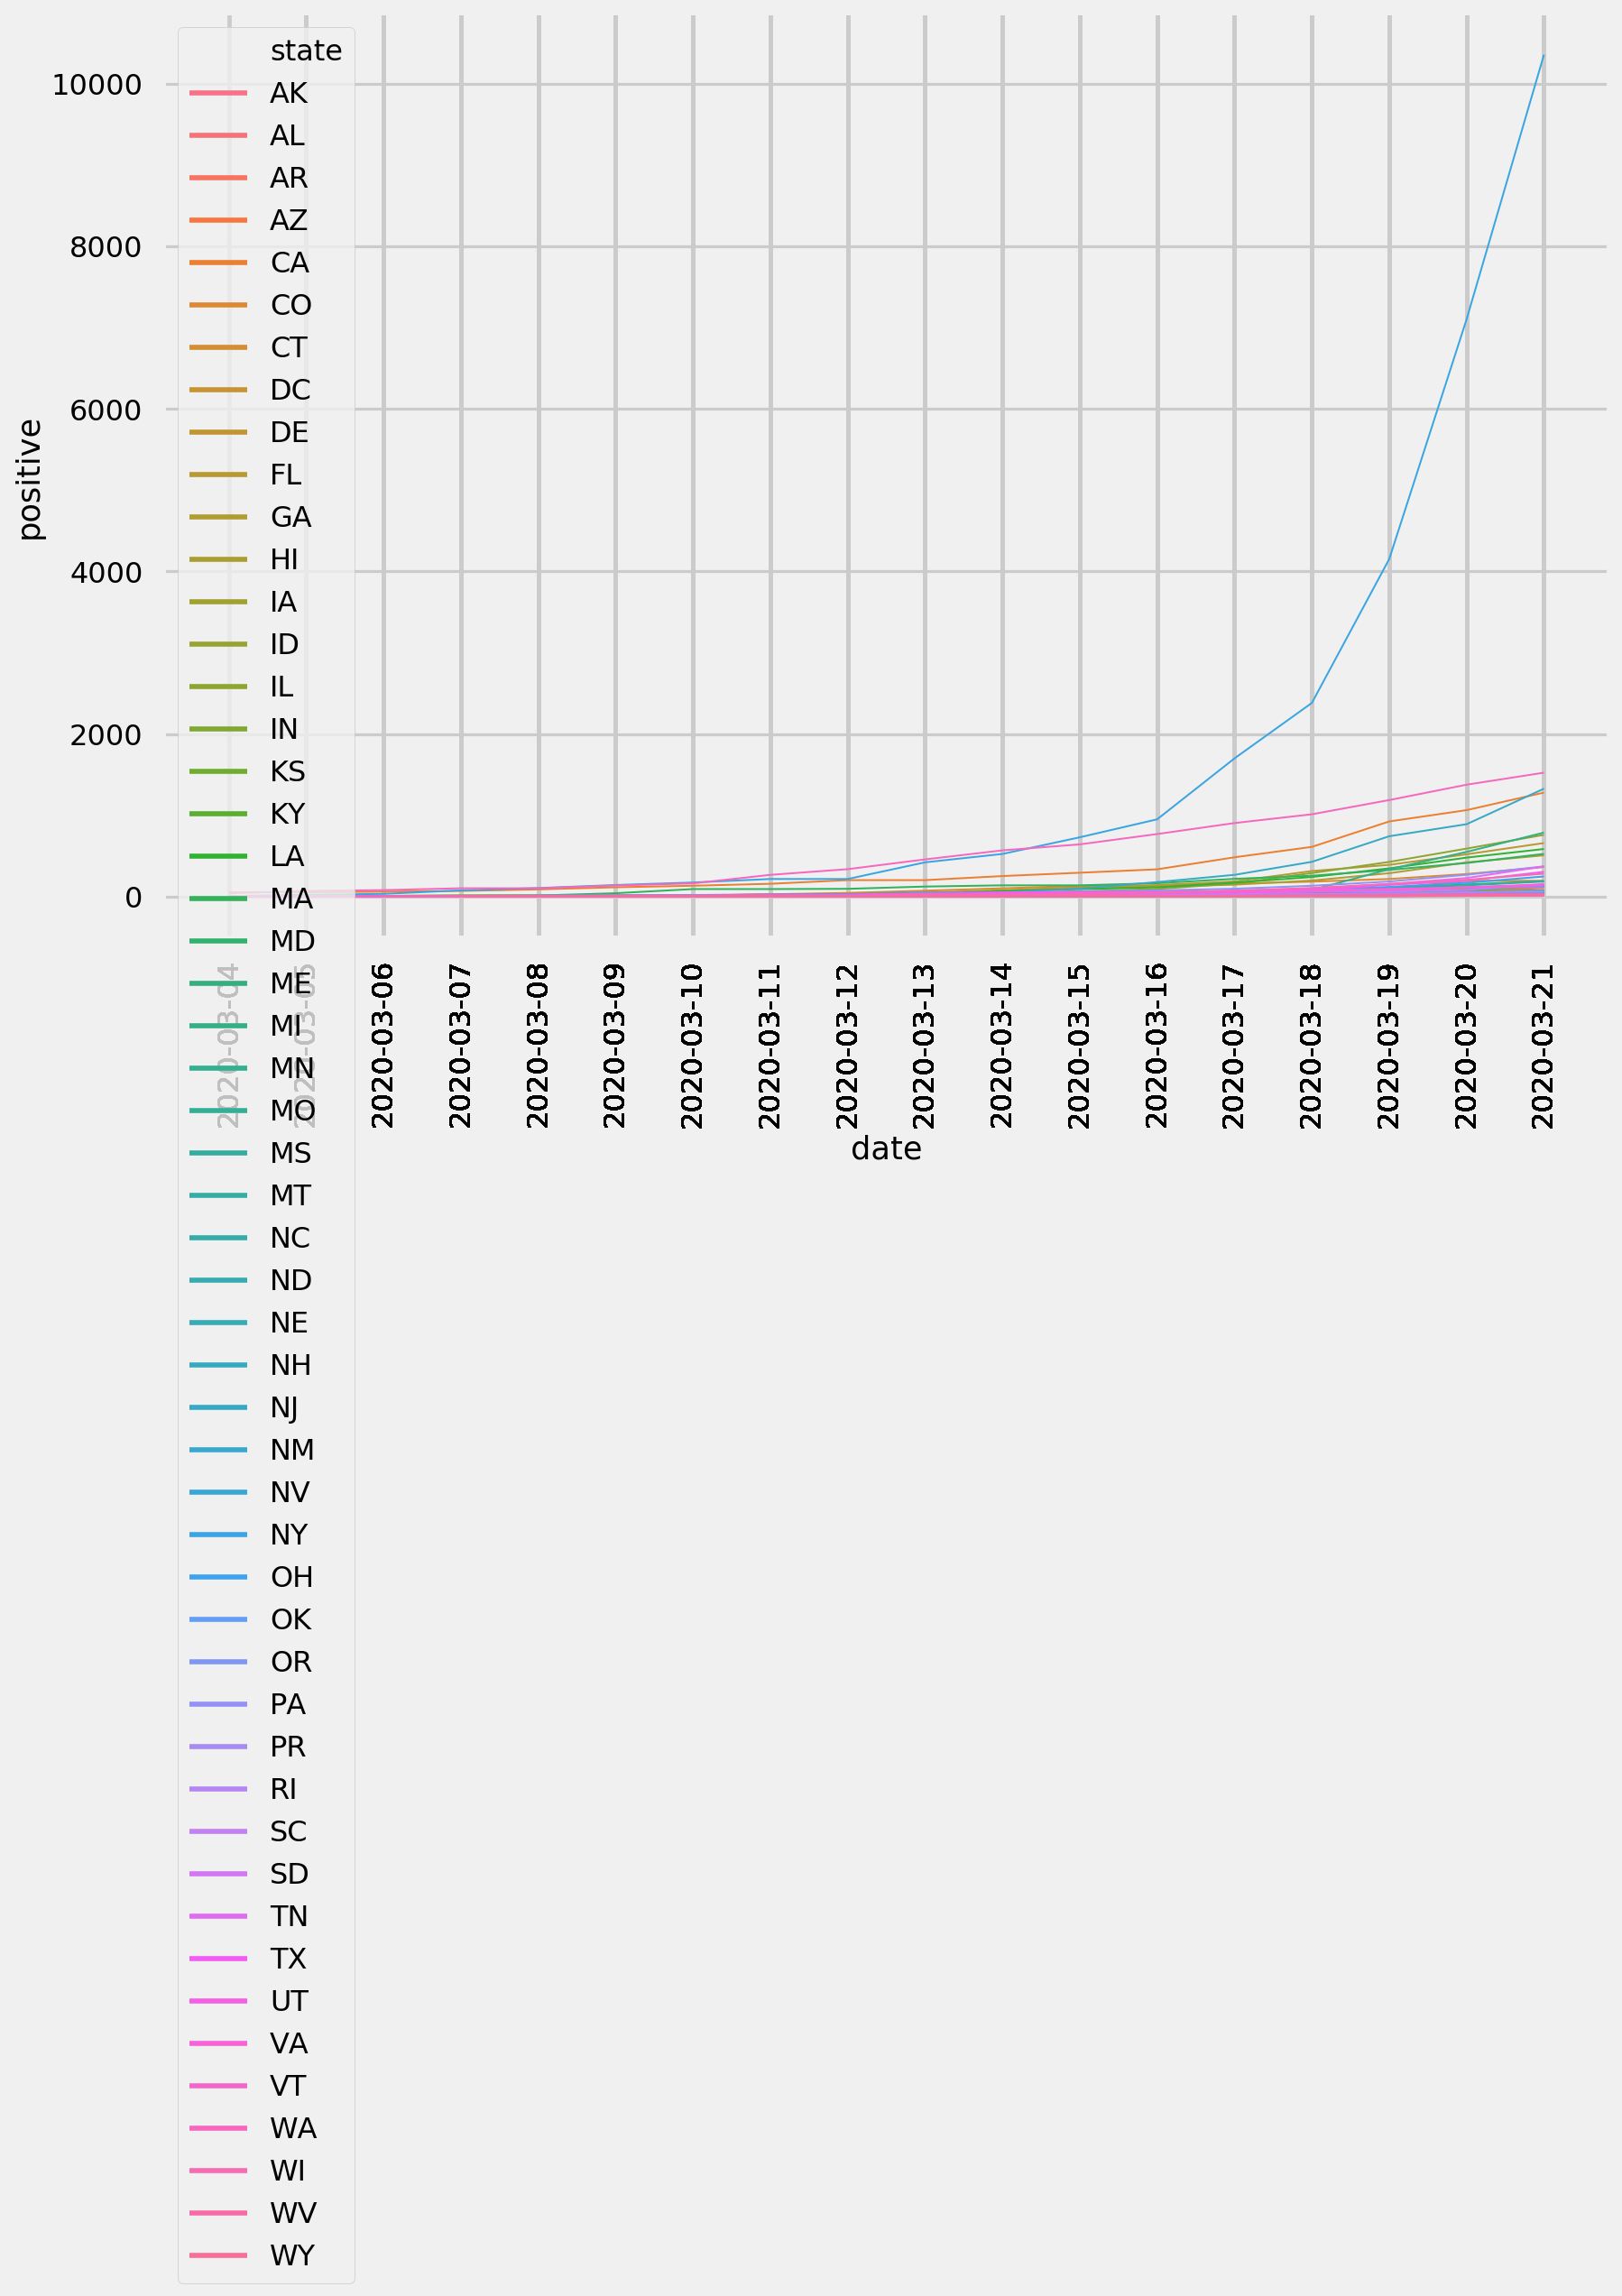

In [31]:
ax = sns.lineplot(x="date", 
                  y="positive", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_states)
ax.set(xticks=df_states.date.values)
plt.xticks(rotation=90)
plt.show()

# Top 10 States

In [32]:
latest_date = df_states['date'].max()
top_states = df_states.query('date == @latest_date').sort_values(by='positive', 
                                                    ascending=False).state.head(10).tolist()
df_top_states = df_states.query('state == @top_states')
top_states

['NY', 'WA', 'NJ', 'CA', 'MI', 'IL', 'FL', 'LA', 'MA', 'GA']

# Top State Positive Cases

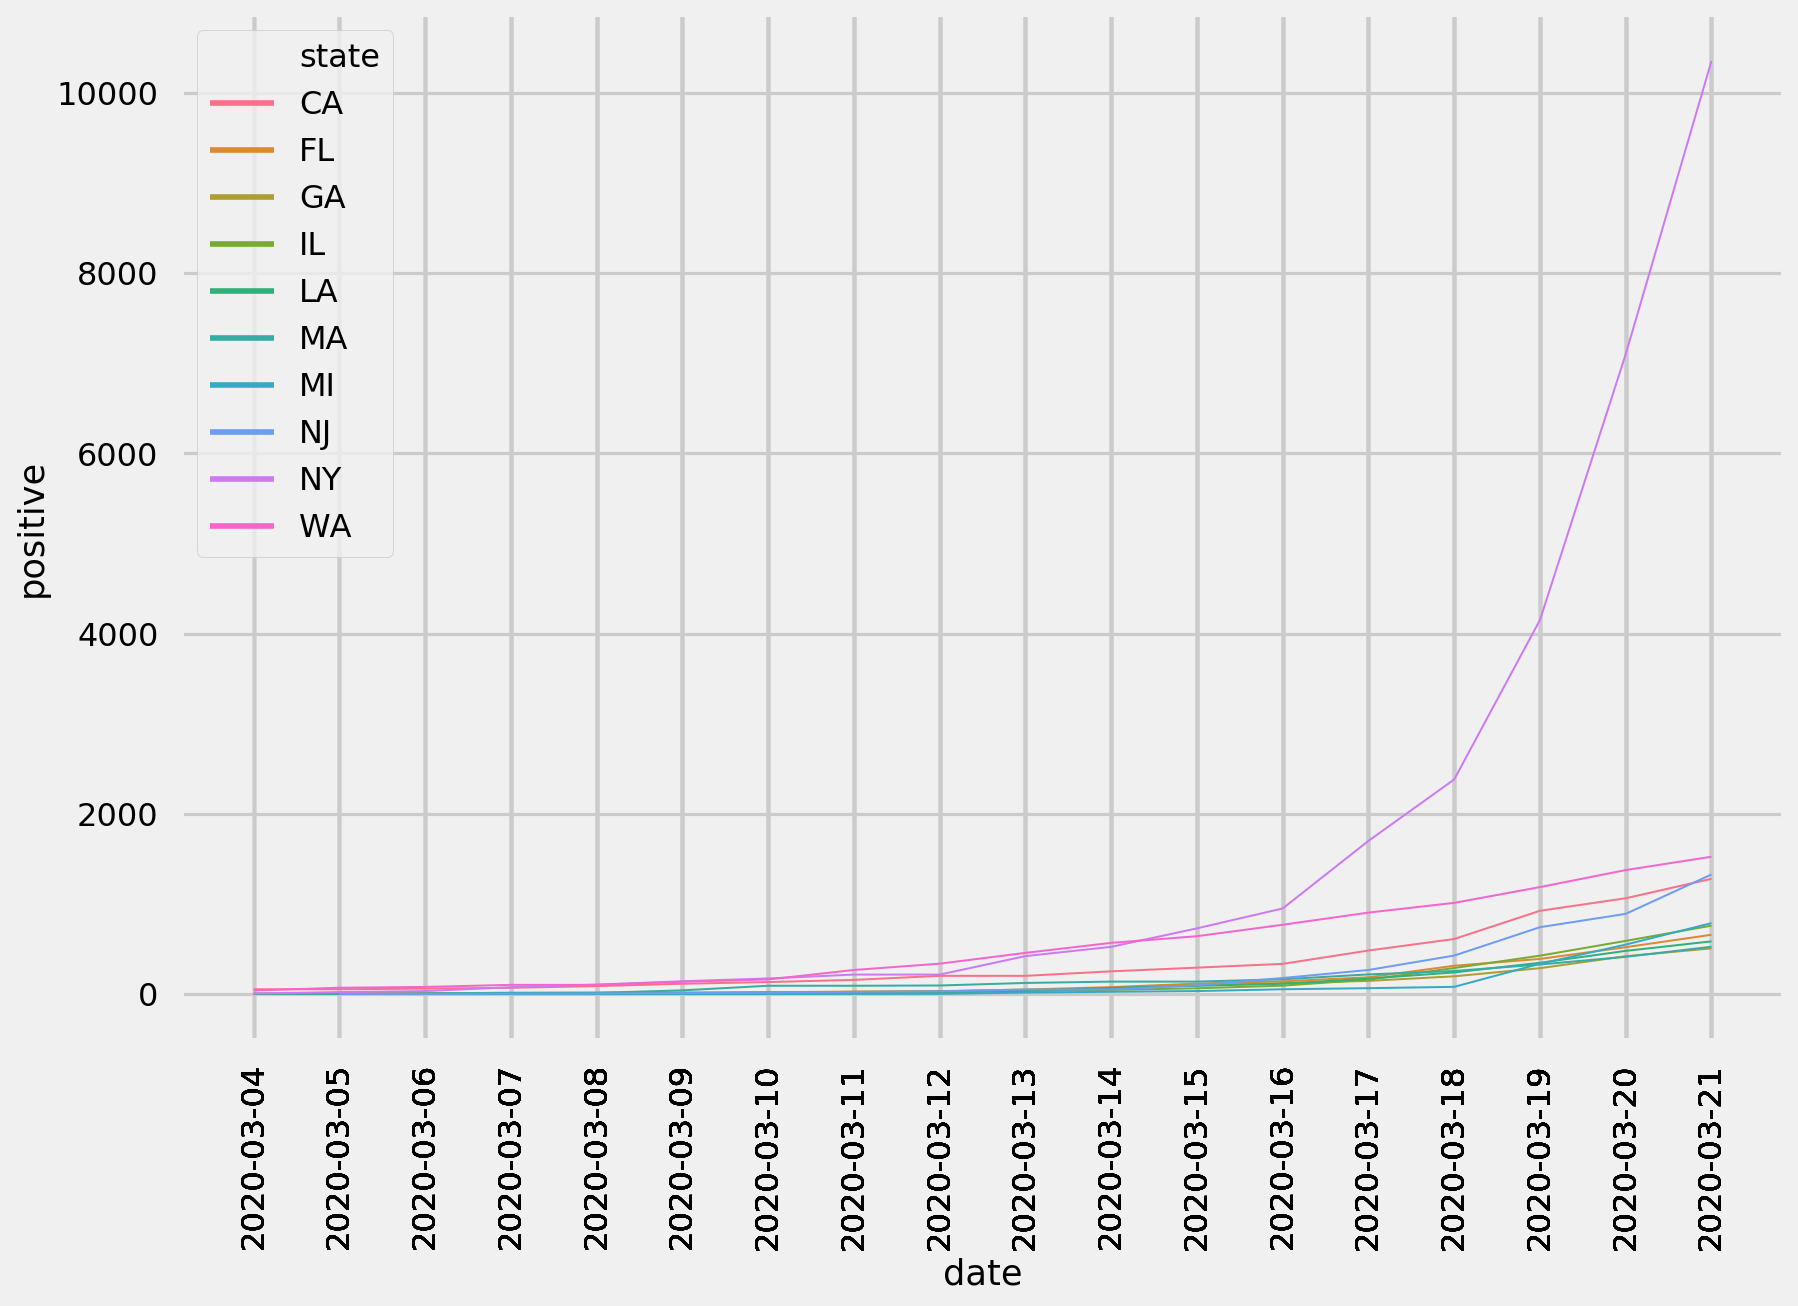

In [33]:
ax = sns.lineplot(x="date", 
                  y="positive", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
plt.xticks(rotation=90)
plt.show()

# Top State Positive Cases (Log Scale)

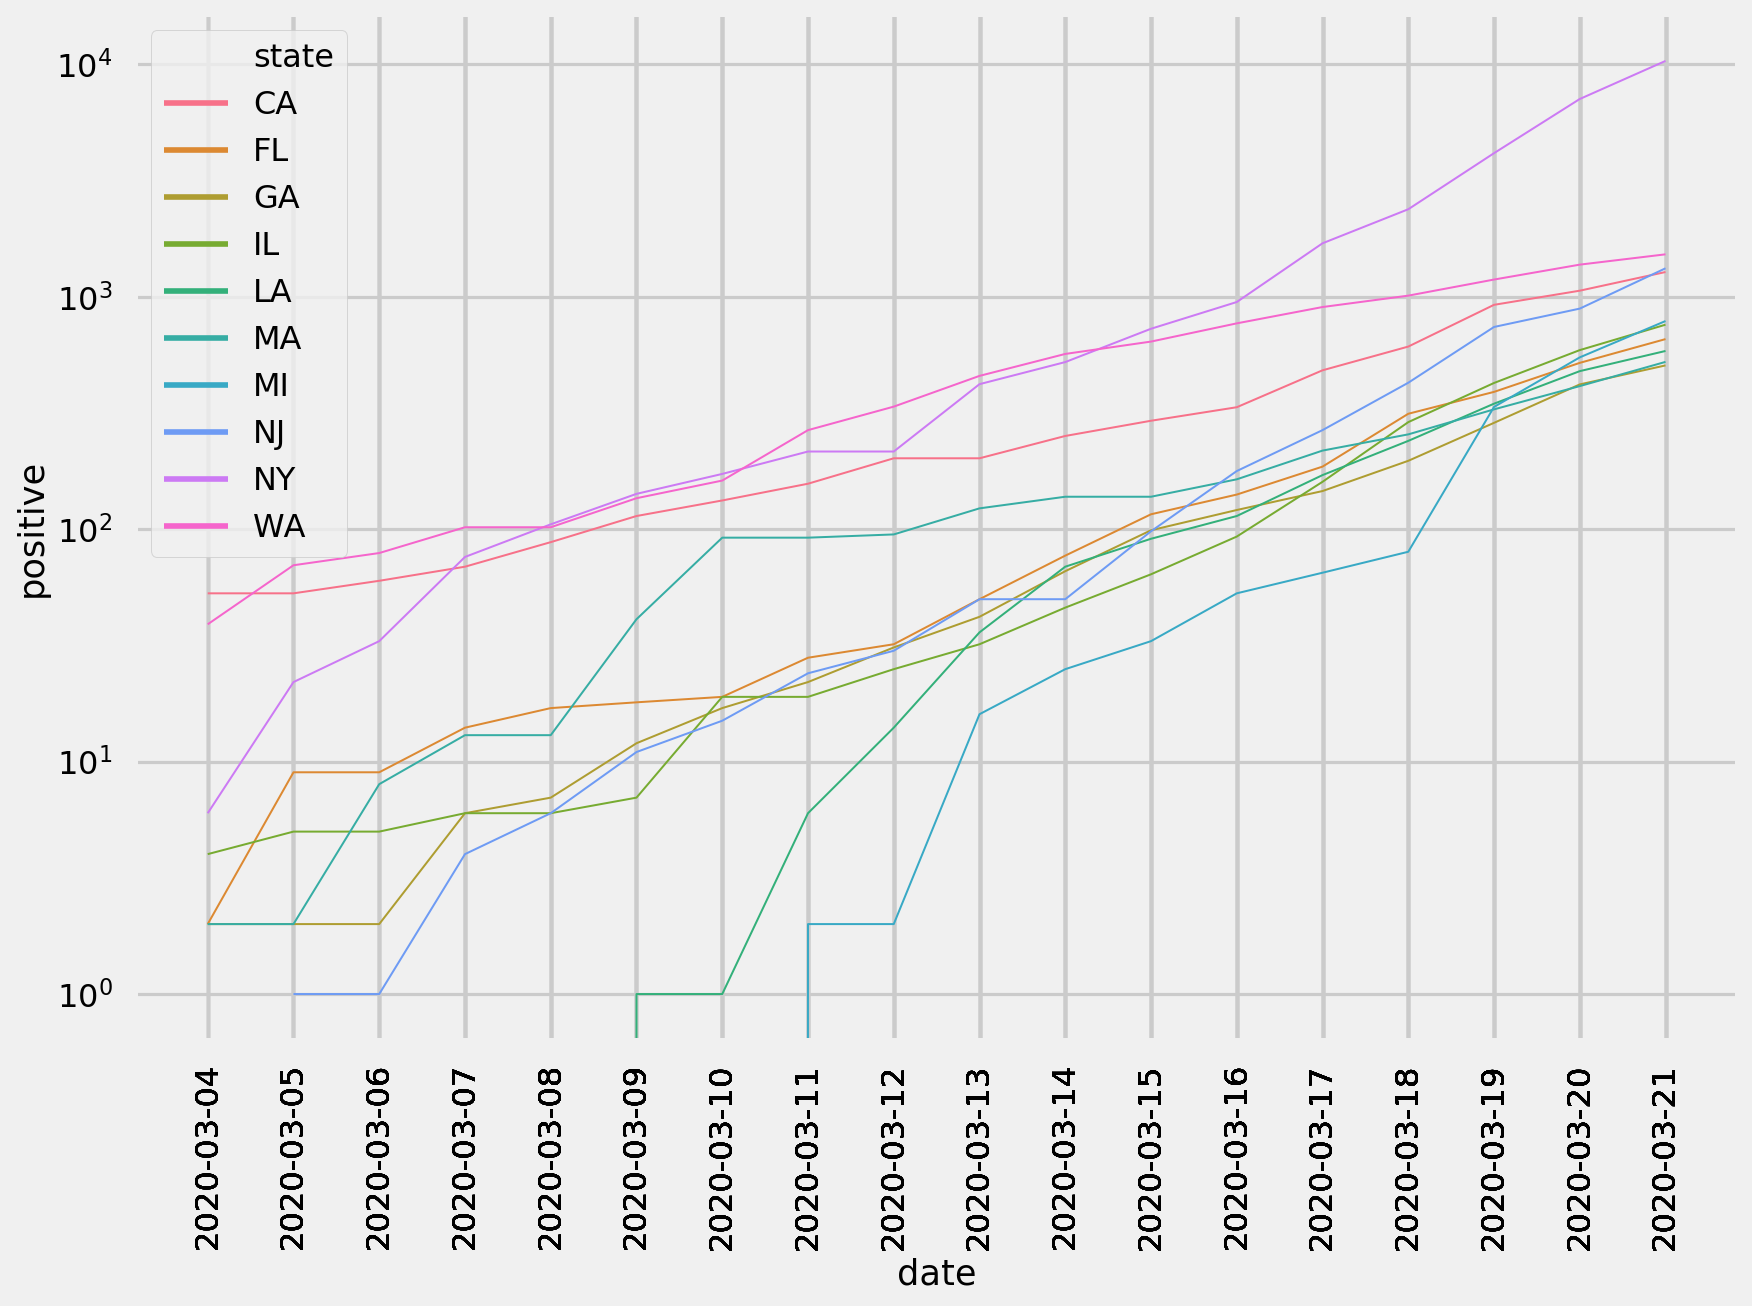

In [34]:
ax = sns.lineplot(x="date", y="positive", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

# Top State Positive Cases as Percent of Population

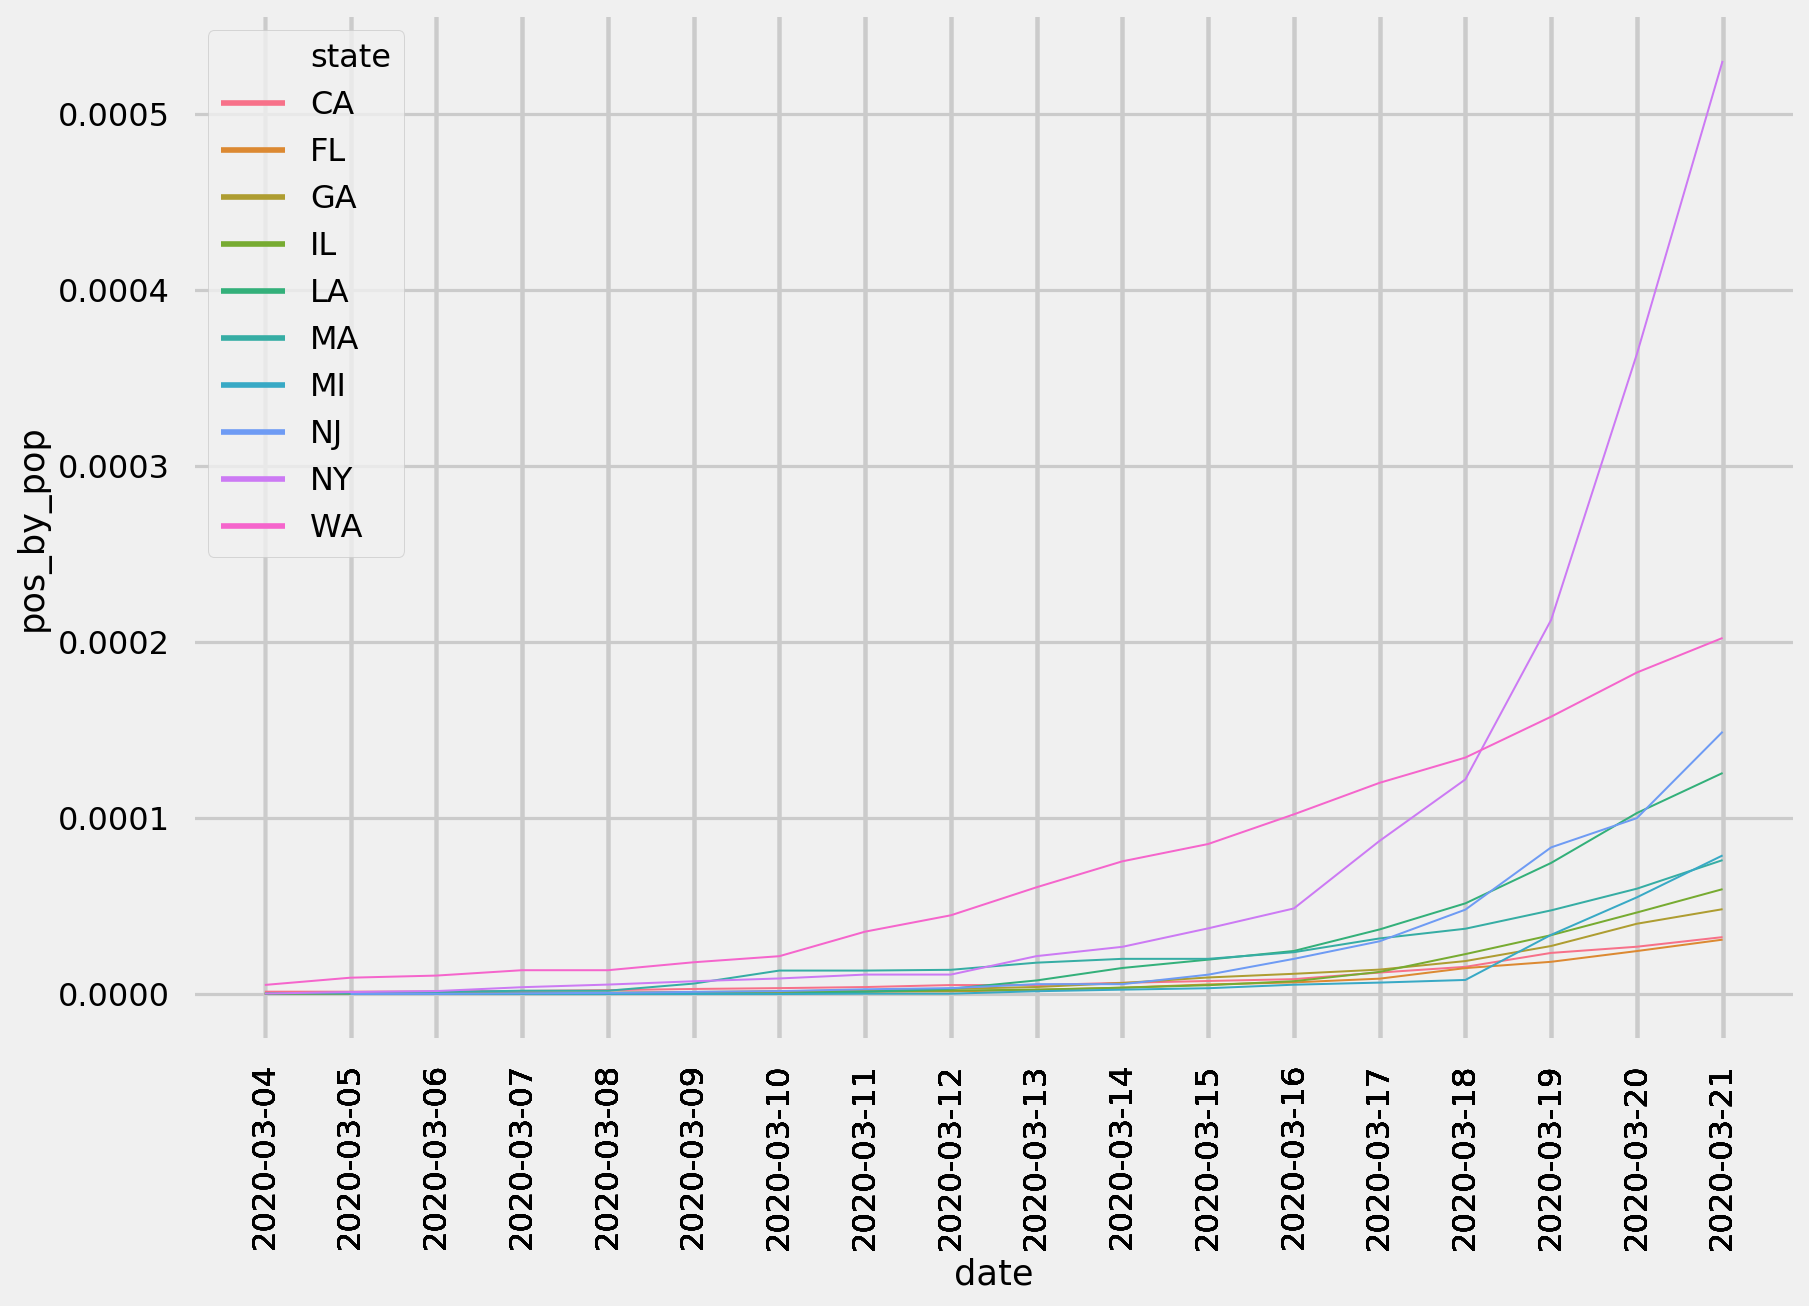

In [35]:
ax = sns.lineplot(x="date", y="pos_by_pop", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
plt.xticks(rotation=90)
plt.show()

# Top State Positive Cases as Percent of Population (Log Scale)

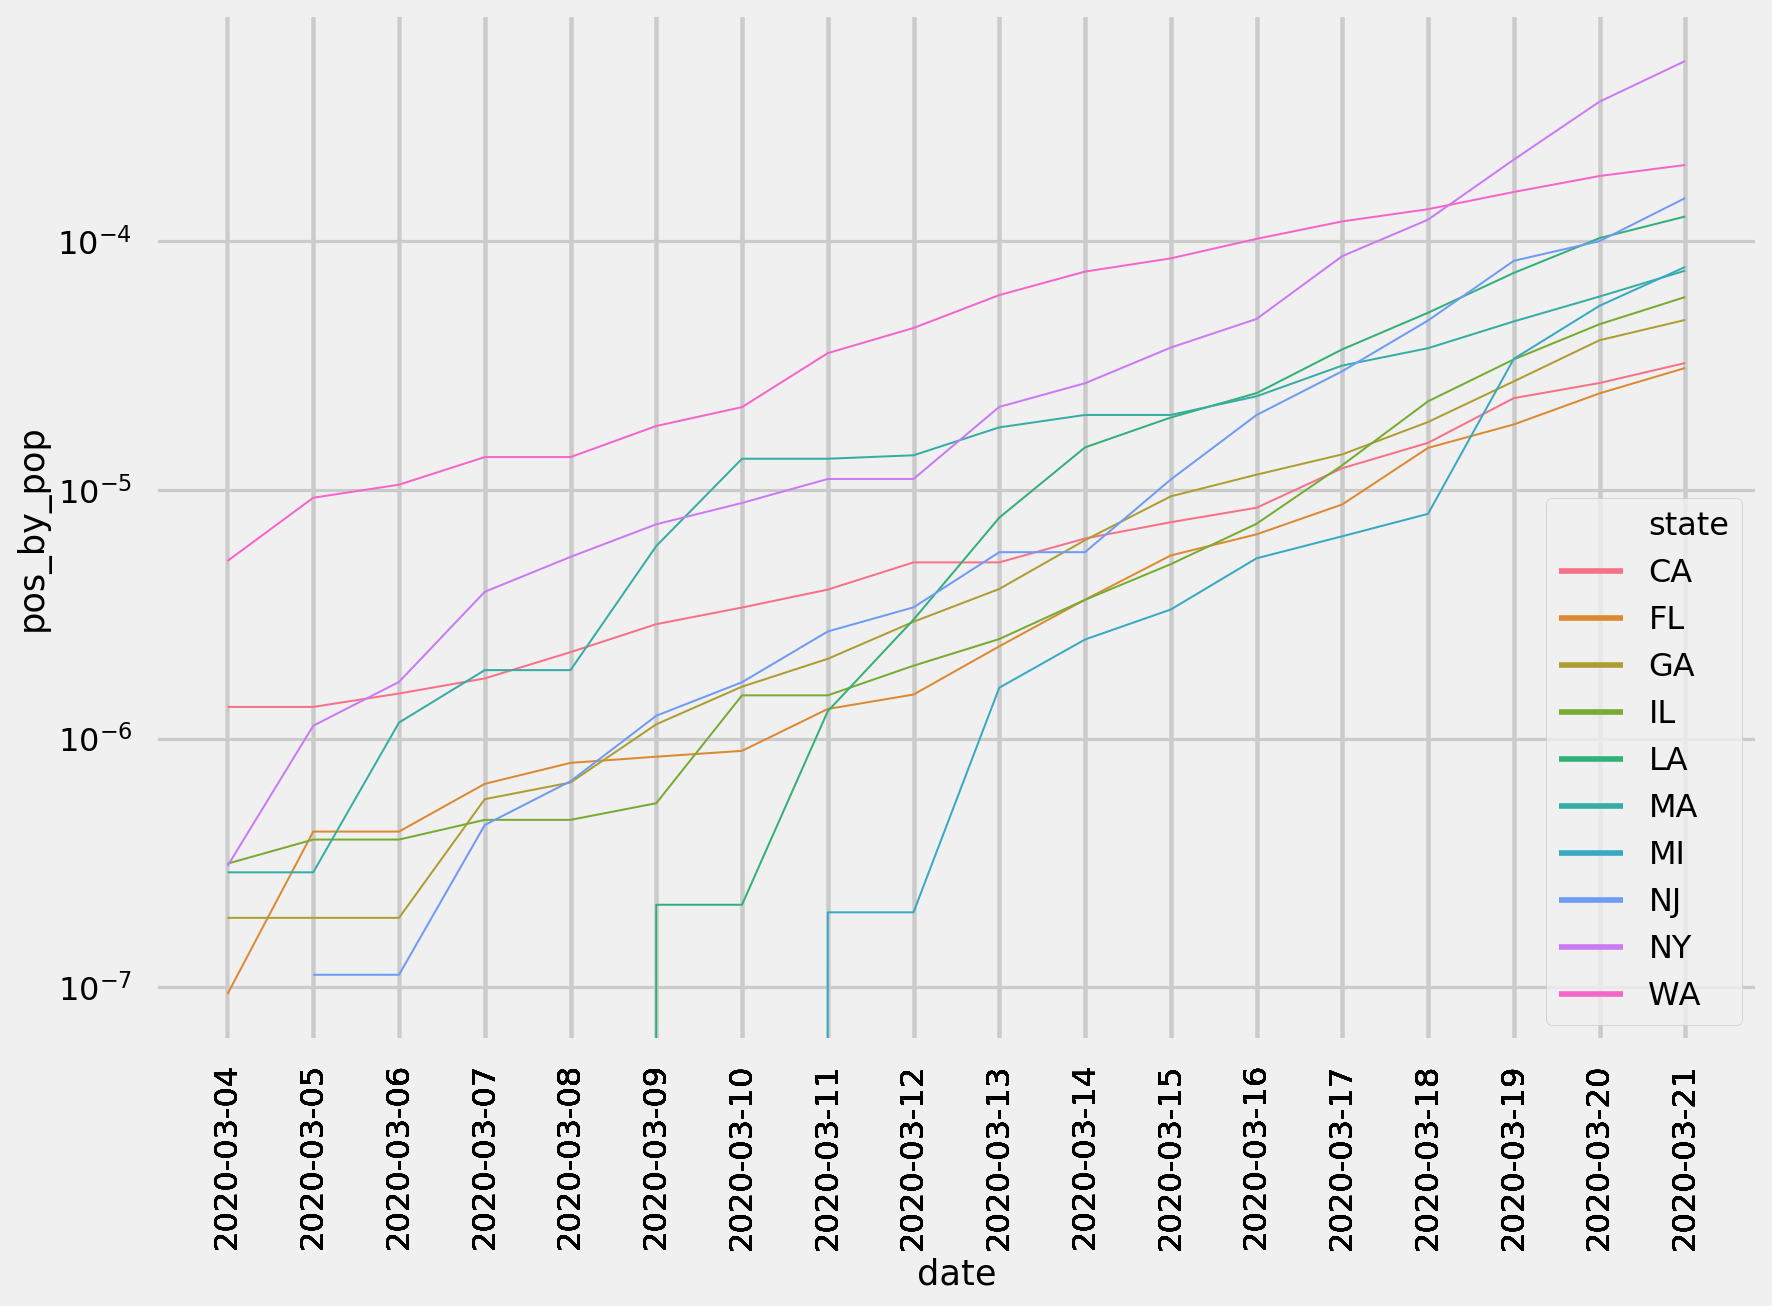

In [36]:
ax = sns.lineplot(x="date", y="pos_by_pop", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

# Percentage of Population Tested

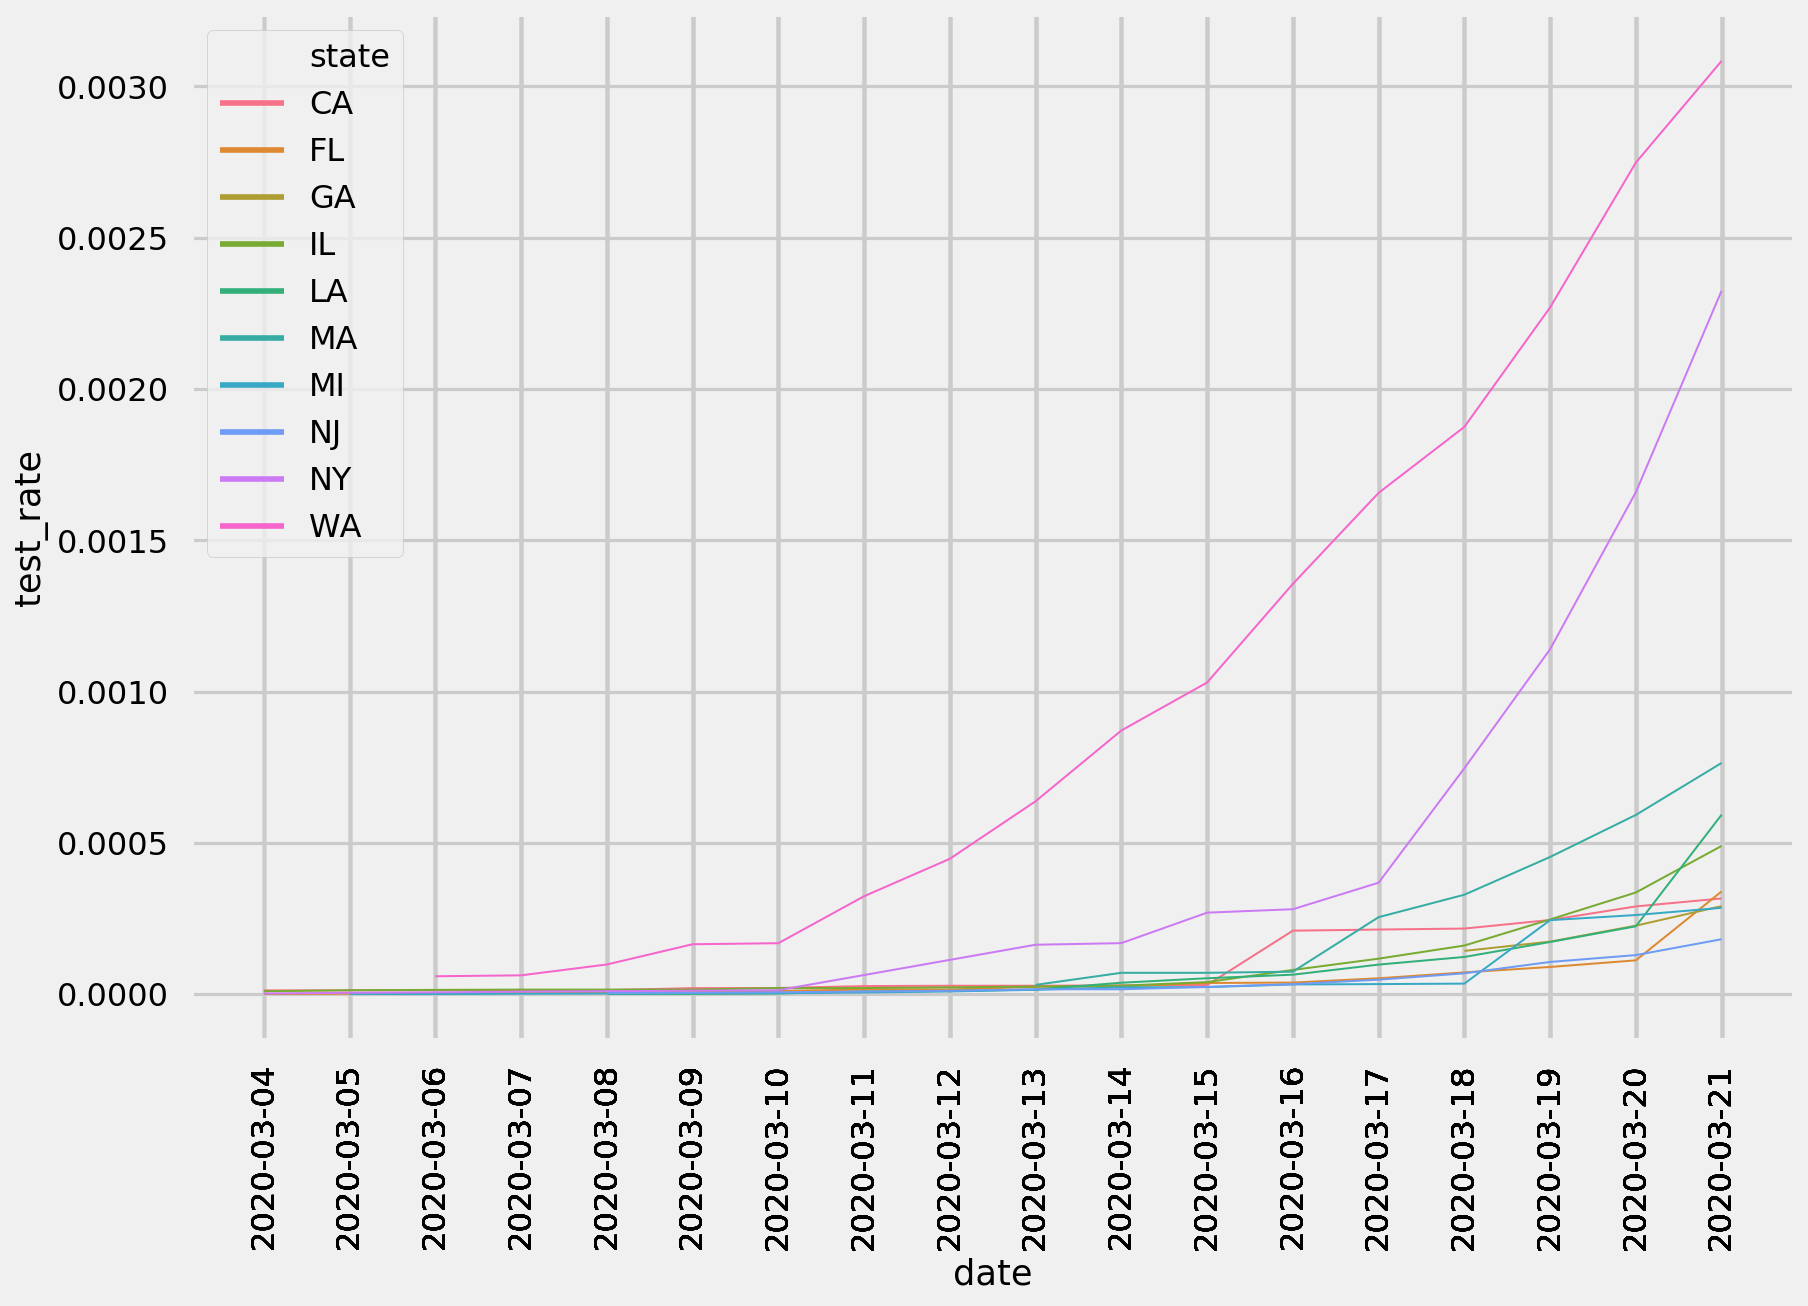

In [37]:
ax = sns.lineplot(x="date", y="test_rate", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
plt.xticks(rotation=90)
plt.show()